# 手动logistics（造轮子）

In [37]:
import time
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# 设定随机种子
torch.manual_seed(2017)

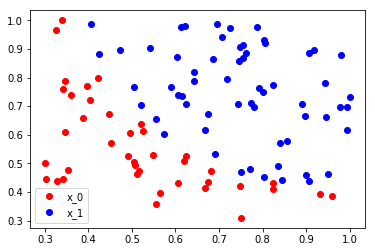

In [5]:
# 从 data.txt 中读入点
with open('./data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]# 读取txt文件中的数字（字符串类型）
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]# 转换为浮点数类型

# 标准化
x0_max = max([i[0] for i in data])# 读取所有 3元素数组中的第1个元素的最大值
x1_max = max([i[1] for i in data])# 读取所有 3元素数组中的第2个元素 最大值
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]
 
x0 = list(filter(lambda x: x[-1] == 0.0, data)) # 选择第一类的点:筛选出3元素中 最后一个元素是0的数组
x1 = list(filter(lambda x: x[-1] == 1.0, data)) # 选择第二类的点

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')
plt.show()

In [10]:
# 将数据转换成 NumPy 的类型，接着转换到 Tensor 为之后的训练做准备
np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2] 100行(x,y)
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，np_data[:, -1] 逗号前是行，后是列
x_data = Variable(x_data)
y_data = Variable(y_data)

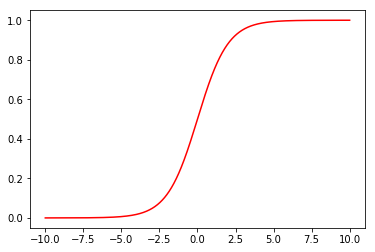

In [11]:
# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 随手画出 sigmoid 的图像
plot_x = np.arange(-10, 10.01, 0.01)
plot_y = sigmoid(plot_x)
plt.plot(plot_x, plot_y, 'r')
plt.show()

In [14]:
# 计算loss
def binary_loss(y_pred, y):
    logits = (y * y_pred.clamp(1e-12).log() + (1 - y) * (1 - y_pred).clamp(1e-12).log()).mean()
    return -logits

In [15]:
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.6412)


In [16]:
# 自动求导并更新参数
loss.backward()
w.data = w.data - 0.1 * w.grad.data
b.data = b.data - 0.1 * b.grad.data

# 算出一次更新之后的loss
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.6407)


In [50]:
# 使用 torch.optim 更新参数
from torch import nn
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

optimizer = torch.optim.SGD([w, b], lr=1.)

In [62]:
# 进行 1000 次更新
import time

start = time.time()
for e in range(1000):
    # 前向传播
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data) # 计算 loss
    # 反向传播
    optimizer.zero_grad() # 使用优化器将梯度归 0
    loss.backward()
    optimizer.step() # 使用优化器来更新参数
    # 计算正确率
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().item() / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))
during = time.time() - start
print()
print('During Time: {:.3f} s'.format(during))

epoch: 200, Loss: 0.24819, Acc: 0.89000
epoch: 400, Loss: 0.24124, Acc: 0.89000
epoch: 600, Loss: 0.23585, Acc: 0.89000
epoch: 800, Loss: 0.23156, Acc: 0.89000
epoch: 1000, Loss: 0.22806, Acc: 0.89000

During Time: 0.380 s


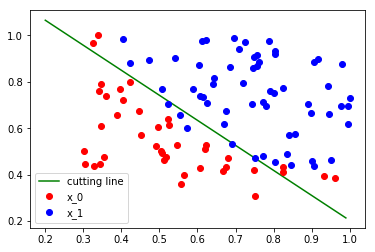

In [54]:
# 画出更新之后的结果
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0.numpy() * plot_x - b0.numpy()) / w1.numpy()

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')
plt.show()

# 使用封装logistics

In [65]:
import time
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable

# 设定随机种子
t.manual_seed(2017)

In [66]:
# 从 data.txt 中读入点
with open('./data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]# 读取txt文件中的数字（字符串类型）
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]# 转换为浮点数类型

# 标准化
x0_max = max([i[0] for i in data])# 读取所有 3元素数组中的第1个元素的最大值
x1_max = max([i[1] for i in data])# 读取所有 3元素数组中的第2个元素 最大值
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]
 
x0 = list(filter(lambda x: x[-1] == 0.0, data)) # 选择第一类的点:筛选出3元素中 最后一个元素是0的数组
x1 = list(filter(lambda x: x[-1] == 1.0, data)) # 选择第二类的点

In [67]:
# 将数据转换成 NumPy 的类型，接着转换到 Tensor 为之后的训练做准备
np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = t.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2] 100行(x,y)
y_data = t.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，np_data[:, -1] 逗号前是行，后是列
x_data = Variable(x_data)
y_data = Variable(y_data)

In [68]:
# PyTorch 中的优化器 torch.optim, 尝试新的数据类型 nn.Parameter；梯度下降法 torch.optim.SGD ；更新参数 optimizer.step() ；学习率 lr 
w = nn.Parameter(t.randn(2, 1))
b = nn.Parameter(t.zeros(1))

In [69]:
# 使用 torch.optim 更新参数
optimizer = t.optim.SGD([w, b], lr=1.)

In [70]:
# 使用自带的loss
criterion = nn.BCEWithLogitsLoss() # 将 sigmoid 和 loss 写在一层，有更快的速度、更好的稳定性

def logistic_reg(x):
    return t.mm(x, w) + b

In [71]:
# 同样进行 1000 次更新

start = time.time()
for e in range(1000):
    # 前向传播
    y_pred = logistic_reg(x_data)
    loss = criterion(y_pred, y_data)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 计算正确率
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().item() / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))

during = time.time() - start
print()
print('During Time: {:.3f} s'.format(during))

epoch: 200, Loss: 0.39533, Acc: 0.85000
epoch: 400, Loss: 0.32387, Acc: 0.88000
epoch: 600, Loss: 0.29027, Acc: 0.87000
epoch: 800, Loss: 0.27053, Acc: 0.87000
epoch: 1000, Loss: 0.25748, Acc: 0.88000

During Time: 0.353 s


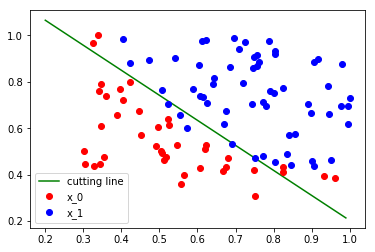

In [72]:
# 画出更新之后的结果
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0.numpy() * plot_x - b0.numpy()) / w1.numpy()

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')
plt.show()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


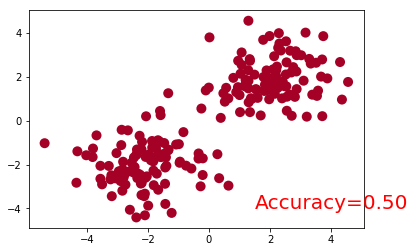

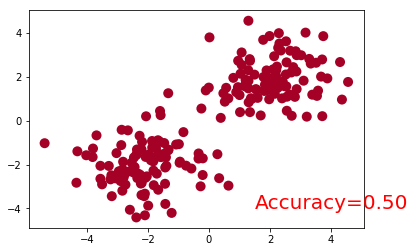

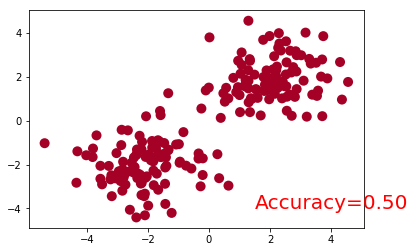

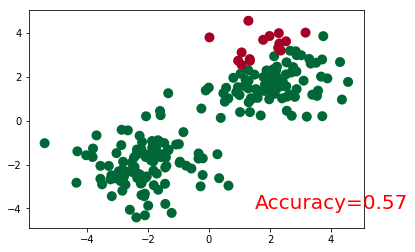

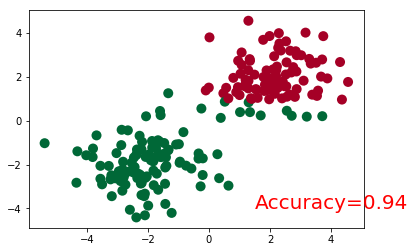

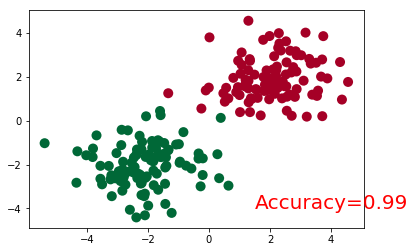

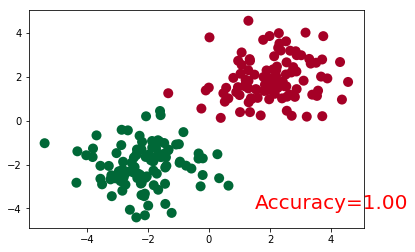

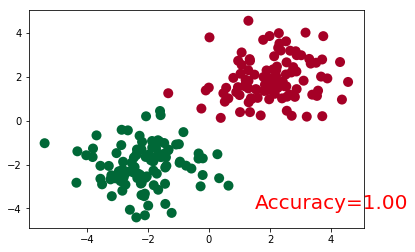

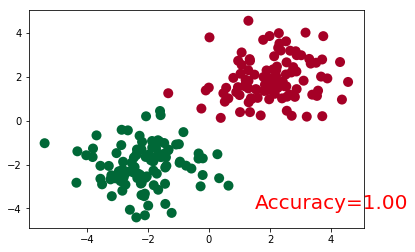

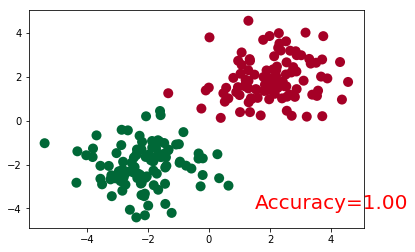

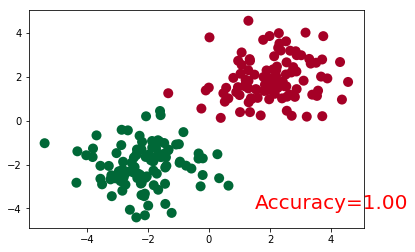

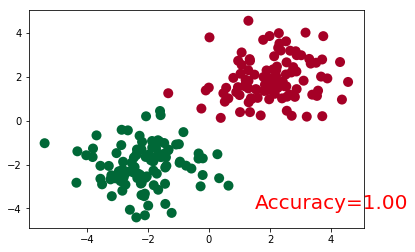

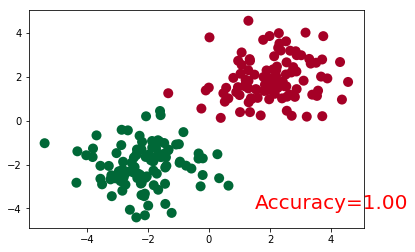

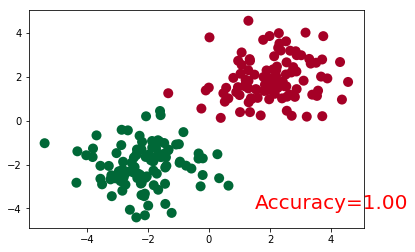

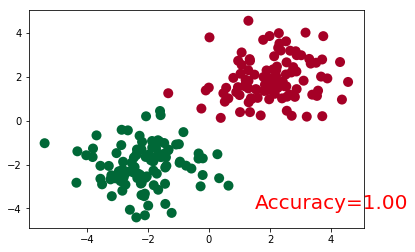

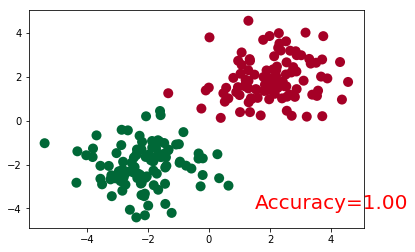

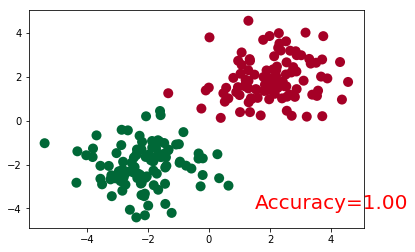

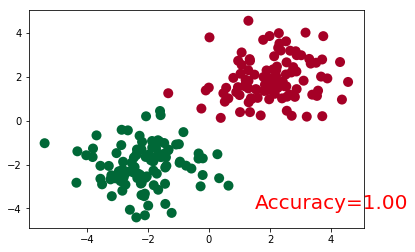

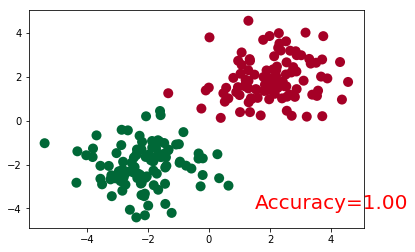

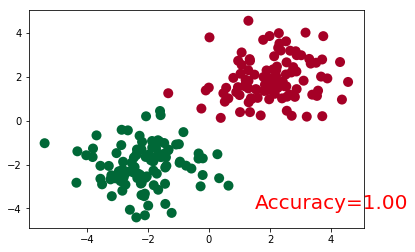

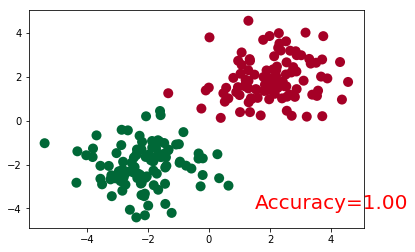

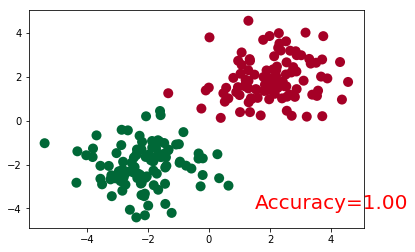

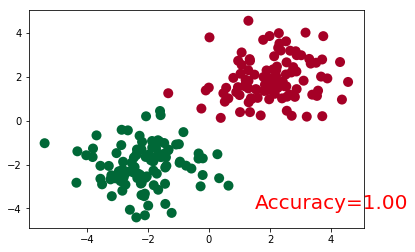

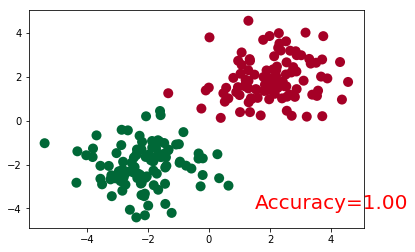

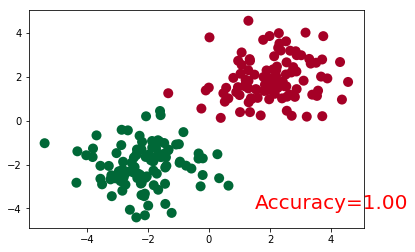

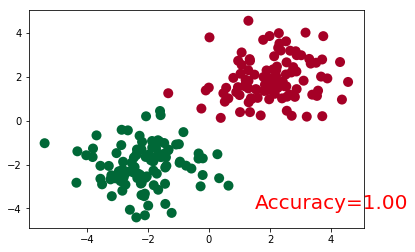

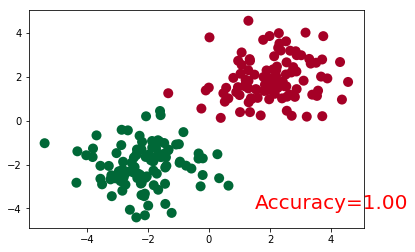

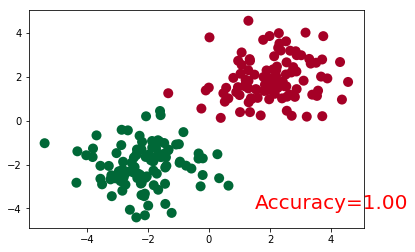

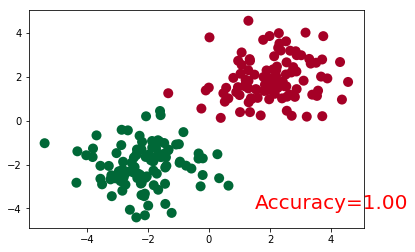

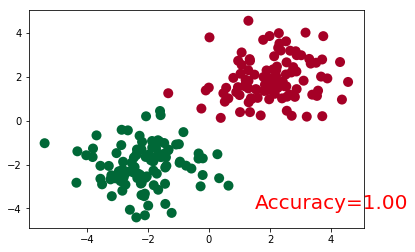

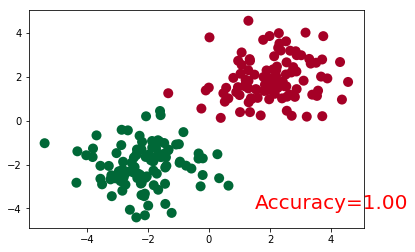

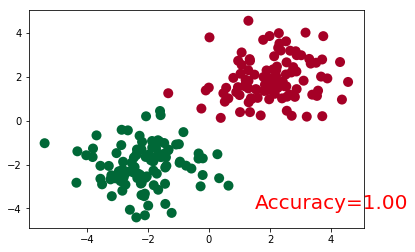

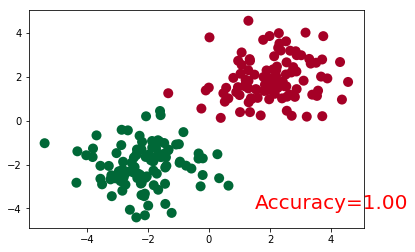

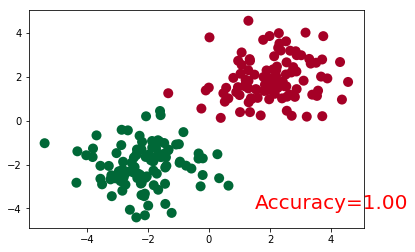

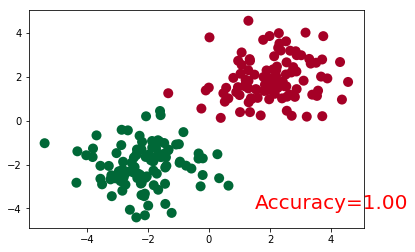

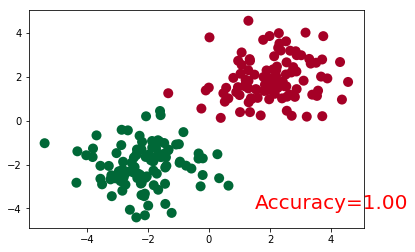

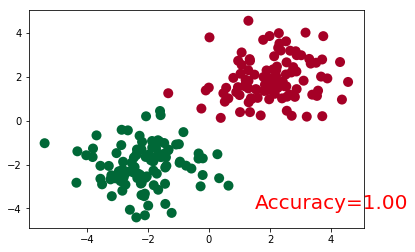

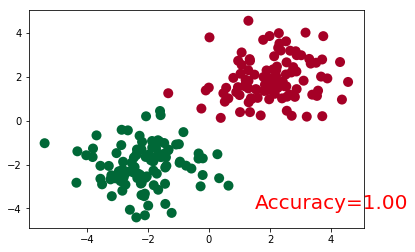

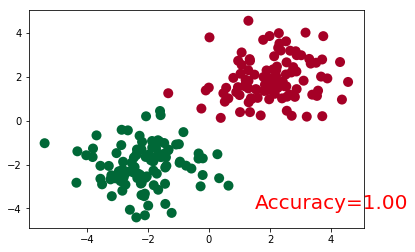

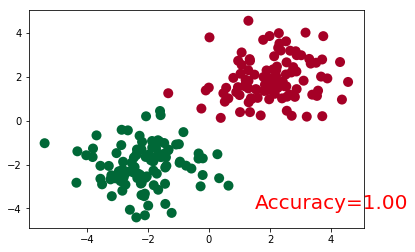

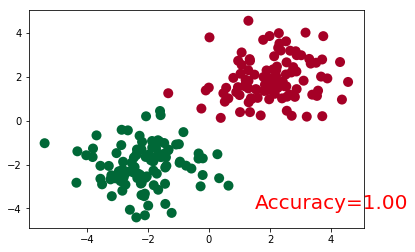

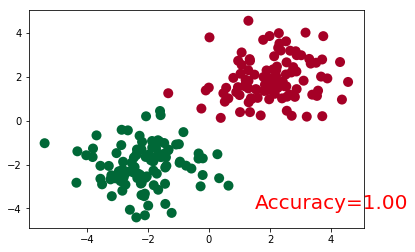

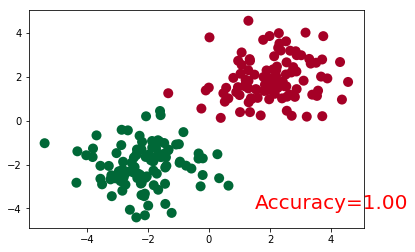

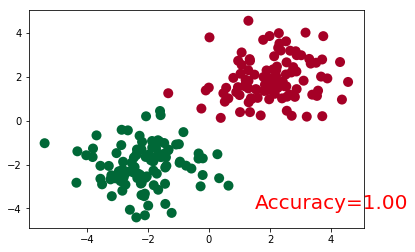

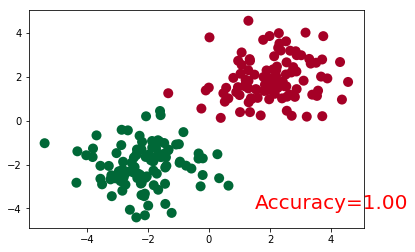

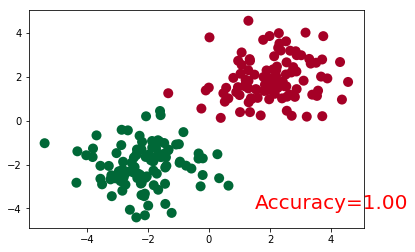

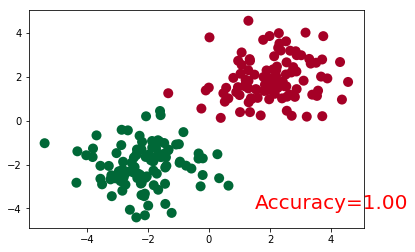

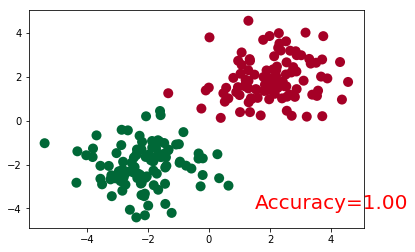

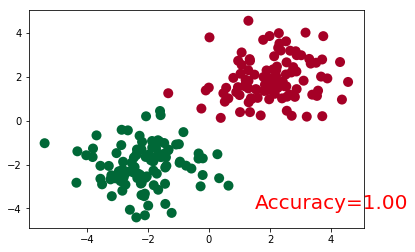

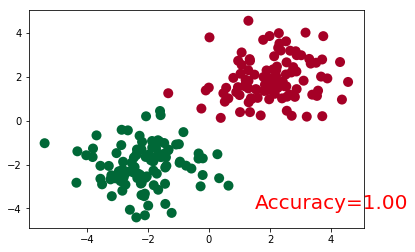

In [6]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.1.11
matplotlib
"""
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer
# cat 拼接tensor ,0 按行数拼接（行数增加） ,1按列数拼接 不写参数默认按列拼接

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()